In [77]:
import pandas as pd

In [78]:
#read the toyota file without missing values
df=pd.read_excel("Toyota.xls",sheet_name='data', na_values=['?'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            1436 non-null   int64 
 1   Age              1436 non-null   int64 
 2   KM               1436 non-null   int64 
 3   FuelType         1436 non-null   object
 4   HP               1436 non-null   int64 
 5   Met_Color        1436 non-null   int64 
 6   Automatic        1436 non-null   int64 
 7   cc               1436 non-null   int64 
 8   Doors            1436 non-null   int64 
 9   Quarterly_Tax    1436 non-null   int64 
 10  Mfr_Guarantee    1436 non-null   int64 
 11  Airco            1436 non-null   int64 
 12  Automatic_airco  1436 non-null   int64 
 13  CD_Player        1436 non-null   int64 
 14  Powered_Windows  1436 non-null   int64 
 15  Sport_Model      1436 non-null   int64 
 16  Tow_Bar          1436 non-null   int64 
 17  Cylinders        1436 non-null   

In [37]:
df.describe()

,Price,Age,KM,HP,Met_Color,Automatic,cc,Doors,Quarterly_Tax,Mfr_Guarantee,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Cylinders
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,87.122563,0.409471,0.508357,0.056407,0.218663,0.561978,0.300139,0.277855,4.0
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,41.128611,0.491907,0.500104,0.230786,0.413483,0.496317,0.458478,0.448098,0.0
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,85.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.0
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,85.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.0
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,283.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.0


In [80]:
df=df.drop(columns=['Cylinders','Quarterly_Tax'])

In [39]:
df['FuelType'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: FuelType, dtype: int64

In [81]:
df= df.drop(index=df[df['KM']<=50].index)

In [82]:
df.loc[df['FuelType'] =='CNG', 'FuelType'] = 'NonPetrol'

In [83]:
df.loc[df['FuelType']  =='Diesel','FuelType']='NonPetrol'

In [84]:
df['FuelType'].value_counts()

Petrol       1257
NonPetrol     170
Name: FuelType, dtype: int64

In [85]:
#observe correlation of numeric variables, for binary variables you may run chisquare test
df.corr(numeric_only=True)

,Price,Age,KM,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
Price,1.000000,-0.876414,-0.567381,0.315705,0.110921,0.036862,0.126747,0.182460,0.200273,0.427447,0.584614,0.483609,0.353784,0.159544,-0.167877
Age,-0.876414,1.000000,0.496680,-0.155016,-0.103998,0.029130,-0.099113,-0.146771,-0.171123,-0.398229,-0.425324,-0.507398,-0.276954,-0.109244,0.185114
KM,-0.567381,0.496680,1.000000,-0.334160,-0.079011,-0.085576,0.105725,-0.033002,-0.220161,-0.125999,-0.255648,-0.261927,-0.150633,-0.044569,0.080877
HP,0.315705,-0.155016,-0.334160,1.000000,0.059975,0.013599,0.035541,0.090308,0.139882,0.241169,0.243922,0.101949,0.265802,-0.008087,0.070800
Met_Color,0.110921,-0.103998,-0.079011,0.059975,1.000000,-0.019052,0.032794,0.087345,0.157897,0.111456,0.031009,0.194897,0.142652,0.004788,0.149000
Automatic,0.036862,0.029130,-0.085576,0.013599,-0.019052,1.000000,0.067052,-0.027248,0.025685,-0.027276,0.060892,-0.009785,-0.004868,0.013333,0.018255
cc,0.126747,-0.099113,0.105725,0.035541,0.032794,0.067052,1.000000,0.080092,-0.058267,0.119442,0.161785,0.059886,0.054678,-0.036374,0.001801
Doors,0.182460,-0.146771,-0.033002,0.090308,0.087345,-0.027248,0.080092,1.000000,0.036658,0.170979,0.049877,0.091521,0.107865,-0.130802,0.105693
Mfr_Guarantee,0.200273,-0.171123,-0.220161,0.139882,0.157897,0.025685,-0.058267,0.036658,1.000000,0.052736,0.065769,0.159463,0.042727,0.050488,-0.023630
Airco,0.427447,-0.398229,-0.125999,0.241169,0.111456,-0.027276,0.119442,0.170979,0.052736,1.000000,0.239218,0.254065,0.541405,0.001378,-0.023037


In [86]:
# remove outliers
from scipy import stats
df['z_score_price'] = stats.zscore( df.Price )

In [87]:
import numpy as np
df = df[np.abs(df['z_score_price']) < 3.0]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1434
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            1400 non-null   int64  
 1   Age              1400 non-null   int64  
 2   KM               1400 non-null   int64  
 3   FuelType         1400 non-null   object 
 4   HP               1400 non-null   int64  
 5   Met_Color        1400 non-null   int64  
 6   Automatic        1400 non-null   int64  
 7   cc               1400 non-null   int64  
 8   Doors            1400 non-null   int64  
 9   Mfr_Guarantee    1400 non-null   int64  
 10  Airco            1400 non-null   int64  
 11  Automatic_airco  1400 non-null   int64  
 12  CD_Player        1400 non-null   int64  
 13  Powered_Windows  1400 non-null   int64  
 14  Sport_Model      1400 non-null   int64  
 15  Tow_Bar          1400 non-null   int64  
 16  z_score_price    1400 non-null   float64
dtypes: float64(1),

In [89]:
df=df.drop(columns='z_score_price')

In [90]:
# convert Fueltype into dummy variable
categorical_features = [ 'FuelType']
df = pd.get_dummies(df,columns=categorical_features,drop_first = True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1434
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Price            1400 non-null   int64
 1   Age              1400 non-null   int64
 2   KM               1400 non-null   int64
 3   HP               1400 non-null   int64
 4   Met_Color        1400 non-null   int64
 5   Automatic        1400 non-null   int64
 6   cc               1400 non-null   int64
 7   Doors            1400 non-null   int64
 8   Mfr_Guarantee    1400 non-null   int64
 9   Airco            1400 non-null   int64
 10  Automatic_airco  1400 non-null   int64
 11  CD_Player        1400 non-null   int64
 12  Powered_Windows  1400 non-null   int64
 13  Sport_Model      1400 non-null   int64
 14  Tow_Bar          1400 non-null   int64
 15  FuelType_Petrol  1400 non-null   uint8
dtypes: int64(15), uint8(1)
memory usage: 176.4 KB


In [109]:
predictors = list(df.columns)
predictors

['Price',
 'Age',
 'KM',
 'HP',
 'Met_Color',
 'Automatic',
 'cc',
 'Doors',
 'Mfr_Guarantee',
 'Airco',
 'Automatic_airco',
 'CD_Player',
 'Powered_Windows',
 'Sport_Model',
 'Tow_Bar',
 'FuelType_Petrol']

In [110]:
predictors.remove('Price')

In [111]:
# Add a constant column for estimating intercept and create two dataframes for independent variables(X) and dependent variable(Y)
import statsmodels.api as sm
X = sm.add_constant(df[predictors])
Y = df['Price']

In [114]:
#partition the data
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,Y,train_size = 0.7,random_state = 100 )

In [115]:
train_X

,const,Age,KM,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,FuelType_Petrol
190,1.0,40,161000,69,1,0,1900,3,0,0,0,1,0,0,0,0
579,1.0,46,33021,110,1,0,1600,5,1,1,0,0,1,0,0,1
1052,1.0,76,191620,72,0,0,2000,5,0,1,0,0,0,1,1,0
481,1.0,55,63000,110,0,0,1600,4,0,1,0,0,1,0,0,1
362,1.0,41,24000,97,1,0,1400,3,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,1.0,67,67110,86,1,0,1300,5,0,0,0,0,0,0,1,1
60,1.0,22,37400,97,1,0,1400,5,0,1,0,1,1,1,0,1
384,1.0,54,149329,72,1,0,2000,5,0,0,0,0,0,1,1,0
87,1.0,20,66966,90,1,0,2000,3,0,1,0,1,1,1,0,0


In [116]:
#Build multiple regression model using Training data using OLS function from statsmodels.api module
price_lm = sm.OLS( train_y, train_X ).fit()
price_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.859     
Dependent Variable:   Price              AIC:                  16594.9462
Date:                 2023-08-06 18:48   BIC:                  16673.1307
No. Observations:     979                Log-Likelihood:       -8281.5   
Df Model:             15                 F-statistic:          398.3     
Df Residuals:         963                Prob (F-statistic):   0.00      
R-squared:            0.861              Scale:                1.3249e+06
-------------------------------------------------------------------------
                  Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const           15213.1823 396.5457  38.3643 0.0000 14434.9890 15991.3756
Age              -113.9529   3.1595 -36.0664 0.0000  -120.1532  -107.7525
KM                 -0.0154   0.0014 -10.8056 0.0000    -0.0182    -0.0126
HP                 18.2772   3.5026   5.2182 0.0000    11.4036    25.1507
Met_Color        -109.5295  82.7475  -1.3237 0.1859  -271.9156    52.8567
Automatic         637.1347 168.1378   3.7894 0.0002   307.1761   967.0934
cc                  0.0620   0.0802   0.7733 0.4395    -0.0954     0.2194
Doors             207.9680  40.2094   5.1721 0.0000   129.0598   286.8761
Mfr_Guarantee     292.8918  79.3540   3.6910 0.0002   137.1651   448.6186
Airco             301.1090  93.8182   3.2095 0.0014   116.9974   485.2207
Automatic_airco  2616.8493 230.4328  11.3562 0.0000  2164.6410  3069.0576
CD_Player         345.9640 106.5351   3.2474 0.0012   136.8963   555.0317
Powered_Windows   439.7398  88.8081   4.9516 0.0000   265.4600   614.0196
Sport_Model       346.8406  84.1991   4.1193 0.0000   181.6057   512.0755
Tow_Bar          -202.1917  84.5443  -2.3915 0.0170  -368.1039   -36.2794
FuelType_Petrol  -719.0448 168.9439  -4.2561 0.0000 -1050.5854  -387.5042
-------------------------------------------------------------------------
Omnibus:                 54.395         Durbin-Watson:            2.009  
Prob(Omnibus):           0.000          Jarque-Bera (JB):         199.123
Skew:                    0.017          Prob(JB):                 0.000  
Kurtosis:                5.209          Condition No.:            857415 
=========================================================================
* The condition number is large (9e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [117]:
#perform residual analysis
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 800x600 with 0 Axes>

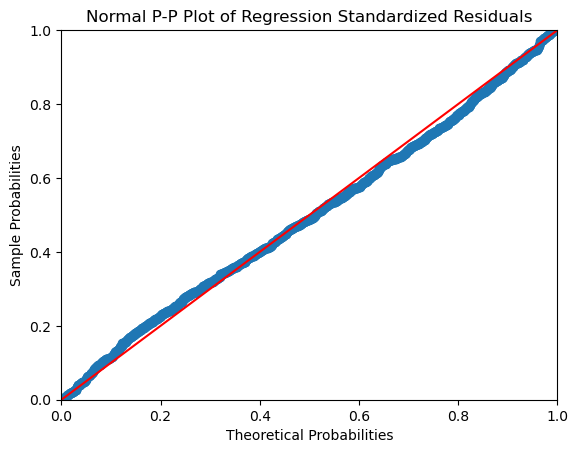

In [118]:
# user defined function for getting standardised values of any variable named vals
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
# draw pp plot using residuals from the model built
probplot = sm.ProbPlot(get_standardized_values(price_lm.resid))
# setting for the plot
plt.figure( figsize = (8, 6))
probplot.ppplot( line='45')
plt.title ( "Normal P-P Plot of Regression Standardized Residuals")
plt.show()

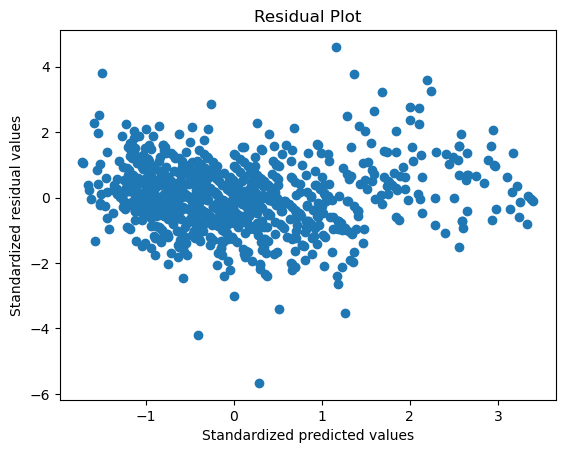

In [119]:
# draw plots for homoscadaecity - an example of user defined function plot_resid_fitted
def plot_resid_fitted(fitted, resid, title):
    plt.scatter(get_standardized_values(fitted),get_standardized_values(resid))
    plt.title(title)
    plt.xlabel("Standardized predicted values")
    plt.ylabel("Standardized residual values")
    plt.show()
    return
# invoke function defined
plot_resid_fitted( price_lm.fittedvalues,price_lm.resid,"Residual Plot")

In [120]:
# Predict outcome variable for the validation data using the model built
pred_y = price_lm.predict(test_X)
# calculate rmse
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(test_y, pred_y))

1150.857411720843

In [121]:
df['Price'].mean()

10443.585

In [122]:
#Compare rmse of training data
pred_y1 = price_lm.predict(train_X)
#CALCULATE rmse for training data
np.sqrt(mean_squared_error(train_y,pred_y1))

1141.5884927794696